## 1.Подготовительные операции
### 1.1.Инициализация

In [42]:
# Моделирование фазоманипулированных сигналов

import numpy as np
import matplotlib.pyplot as plt
import extrafuncs
from matplotlib import cm
from matplotlib import rcParams
from extrafuncs import get_note
from IPython.display import Audio
from scipy import signal
from scipy.io.wavfile import write

time: 3.59 ms


In [43]:
# Графики непосредственно в ноутбуке
%matplotlib inline
# Подсчёт время выполнения ячейки
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 6.12 ms


In [44]:
# Настройка параметров шрифта
# и настройка LaTex для вставки в заголовки на графике

fontSize = 12.0   # Размер шрифта графиков
titleFontSize = 16.0    # Размер шрифта заголовка
fontName = "Liberation Serif"    # Название шрифта
rcParams["mathtext.fontset"] = "custom" # Пользовательские параметры графика
rcParams["mathtext.rm"] = fontName  # Обычный стиль
rcParams["mathtext.bf"] = fontName + ":bold"    # Жирный
rcParams["mathtext.it"] = fontName + ":italic"  # Курсив

time: 1.23 ms


In [45]:
# Параметры графика

PIC_SIZE = (10, 6)  # Размер графика
PIC_DENSITY = 80    # Плотность пикселей графика
SURFACE_CMAP = cm.plasma    # Цвет поверхностей
tColor = "#0072BD"  # Цвет графиков во временной области (синий)
tColorLight = "#4DB3E6"   # Временная область (голубой)
Color0 = "#FF0000"  # Цвет графиков эталонного сигнала (красный)
fColor = "#FF6600"     # Частотная область
eColor = "#D95319"    # Погрешности
eColorLight = "#E6E666"   # Погрешности
eColorDark = "#A2142F"    # Погрешности

time: 1.26 ms


### 1.2.Формирование значений основых параметров

In [46]:
fd = 1025    # Частота дискретизации
audiorate = 4000  # Частота дискретизации аудиофайла
Td = 1 / fd    # Период дискретизации
snrSound = 3 # Уровень шума, дБ
# Длительности нот
t05= np.arange(0, 0.5, Td)  # 0.5 с
t07 = np.arange(0, 0.7, Td)  # 0.7 с
t09 = np.arange(0, 0.9, Td)  # 0.9 с
t10 = np.arange(0, 1.0, Td)   # 1.0 с
t15 = np.arange(0, 1.5, Td) # 1.5 с
t30 = np.arange(0, 3.0, Td)   # 3.0 с
# Определение обозначений для нот
Z_t10 = np.zeros(t10.size)  # пауза 1 с
# Частоты нот первой октавы
A4 = 440.000  # частота ноты ЛЯ,Гц
C4 = A4 * np.power(2, -9 / 12)  # частота ноты ДО,Гц
D4 = A4 * np.power(2, -7 / 12)  # частота ноты РЕ,Гц
D4d = A4 * np.power(2, -6 / 12) # частота ноты РЕ#,Гц
E4 = A4 * np.power(2, -5 / 12)  # частота ноты МИ,Гц
F4 = A4 * np.power(2, -4 / 12)  # частота ноты ФА,Гц
G4 = A4 * np.power(2, -2 / 12)  # частота ноты СОЛЬ,Гц
A4 = A4 * np.power(2, 0 / 12)   # частота ноты ЛЯ,Гц
B4 = A4 * np.power(2, 2 / 12)   # частота ноты СИ,Гц
# Ноты малой октавы
D3 = A4 * np.power(2, -19 / 12) # частота ноты РЕ,Гц
E3 = A4 * np.power(2, -17 / 12) # частота ноты МИ,Гц
F3d = A4 * np.power(2, -15 / 12)# частота ноты ФА#,Гц
G3 = A4 * np.power(2, -14 / 12) # частота ноты СОЛЬ,Гц
A3 = A4 * np.power(2, -12 / 12) # частота ноты ЛЯ,Гц
A3d = A4 * np.power(2, -11 / 12)# частота ноты ЛЯ#,Гц
B3 = A4 * np.power(2, -10 / 12) # частота ноты СИ,Гц

time: 5.38 ms


## 2.Моделирование звукового ряда нот первой октавы
### 2.1.Формирование звукового ряда

In [47]:
# Формирование нотной последовательности

gamma_notes = np.concatenate((Z_t10, get_note(C4, t10), Z_t10, get_note(D4, t10),
Z_t10, get_note(E4, t10), Z_t10, get_note(F4, t10),
Z_t10, get_note(G4, t10), Z_t10, get_note(A4, t10),
Z_t10, get_note(B4, t10), Z_t10))
# Формирование сигнала нотной последовательности во временной области
N_gamma = gamma_notes.size / t10.size
xtime = np.linspace(0., N_gamma, int(N_gamma * fd)) # Область определения

time: 3.08 ms


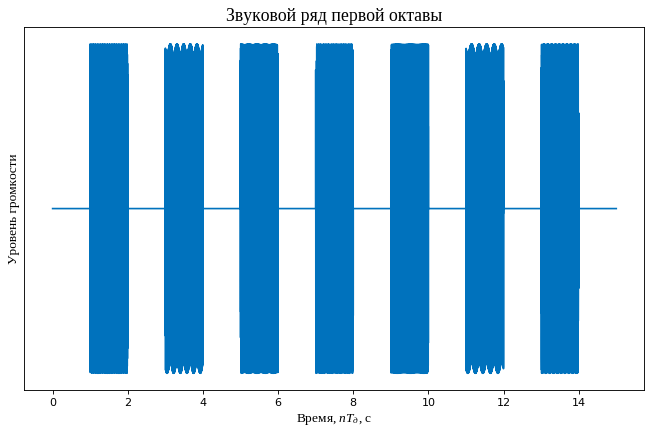

time: 657 ms


In [48]:
# Формирование графика

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
plt.title("Звуковой ряд первой октавы", fontname=fontName, fontsize=titleFontSize)  # Заголовок
plt.xlabel(r"Время, $\mathit{nT_д}$, с", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
plt.ylabel("Уровень громкости", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
plt.yticks([])  # Нет значений на оси ординат
plt.plot(xtime, gamma_notes, color=tColor)

plt.show()  # Построение графика

### 2.2.Формирование спектра мощности

In [49]:
# Формирование спектра мощности

freq, fpNotes = signal.periodogram(gamma_notes, fs=fd)

time: 2.87 ms


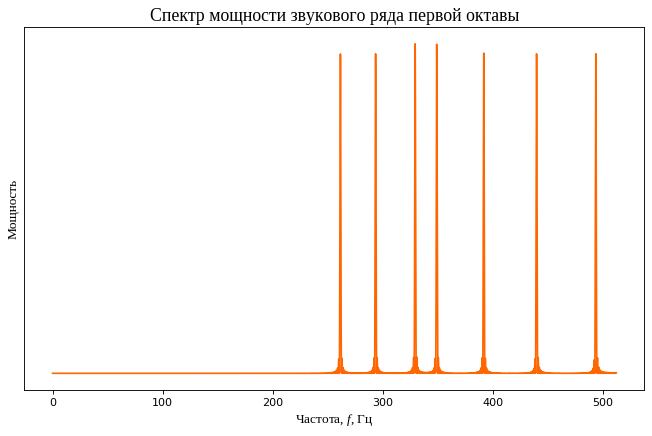

time: 339 ms


In [50]:
# Формирование графика

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
plt.title("Спектр мощности звукового ряда первой октавы", fontname=fontName, fontsize=titleFontSize)  # Заголовок
plt.xlabel(r"Частота, $\mathit{f}$, Гц", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
plt.ylabel("Мощность", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
plt.yticks([])  # Нет значений на оси ординат
plt.plot(freq, fpNotes, color=fColor)
plt.show()  # Построение графика

### 2.3.Формирование спектрограммы

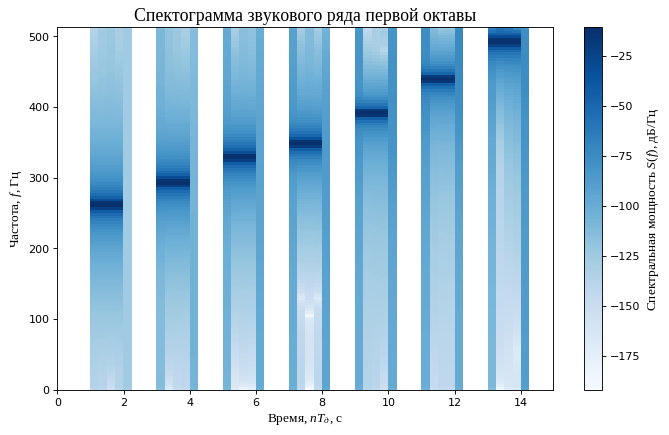

time: 1.01 s


In [51]:
# Формирование спектрограммы звукового ряда

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
ax = fig.gca()
plt.title("Спектограмма звукового ряда первой октавы", fontname=fontName, fontsize=titleFontSize)  # Заголовок
plt.xlabel(r"Время, $\mathit{nТ_д}$, с", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
plt.ylabel(r"Частота, $\mathit{f}$, Гц", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
pxx, freqs, ts, cax = plt.specgram(gamma_notes, Fs=fd, scale="dB", NFFT=256, noverlap=0, cmap=cm.Blues)
cb = fig.colorbar(cax) # Добавление цветовой шкалы
cb.set_label(label=r"Спектральная мощность $\mathit{S(f)}$, дБ/Гц", fontsize=fontSize, fontname=fontName)   # Изменение параметров шрифта цветовой шкалы

plt.show()  # Построение графика

### 2.4.Проигрывание и сохранение в файл звукового ряда

In [52]:
# Проигрывание гаммы
Audio(gamma_notes, rate=audiorate)

time: 4.83 ms


In [53]:
# Запись мелодии в WAV-файл
write("gamma_4000.wav", audiorate, gamma_notes)

time: 1.93 ms


## 3.Моделирование шума звукового ряда
### 3.1.Формирование шума звукового ряда

In [54]:
# Формирование шума нотной последовательности
mu, sigma = 0, 0.5  # Параметры стандартного распределения
ngamma_notes = extrafuncs.awgn(mu, sigma, gamma_notes)

time: 1.76 ms


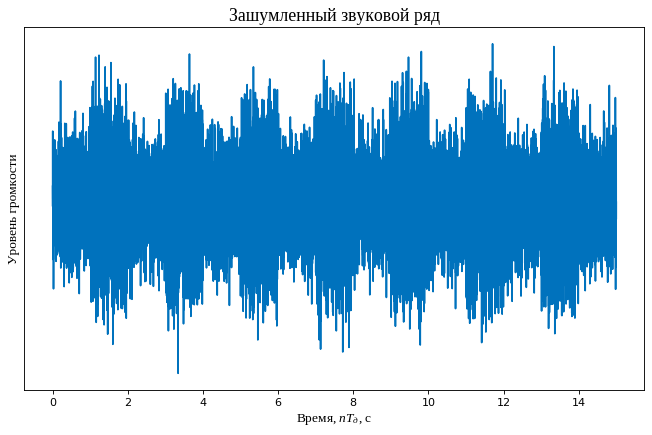

time: 629 ms


In [55]:
# Формирование графика

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
plt.title("Зашумленный звуковой ряд", fontname=fontName, fontsize=titleFontSize)  # Заголовок
plt.xlabel(r"Время, $\mathit{nT_д}$, с", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
plt.ylabel("Уровень громкости", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
plt.yticks([])  # Нет значений на оси ординат
plt.plot(xtime, ngamma_notes, color=tColor)
plt.show()  # Построение графика

### 3.2.Формирование спектра мощности

In [56]:
# Формирование спектра мощности

freq, fpNotes = signal.periodogram(ngamma_notes, fs=fd)

time: 3.3 ms


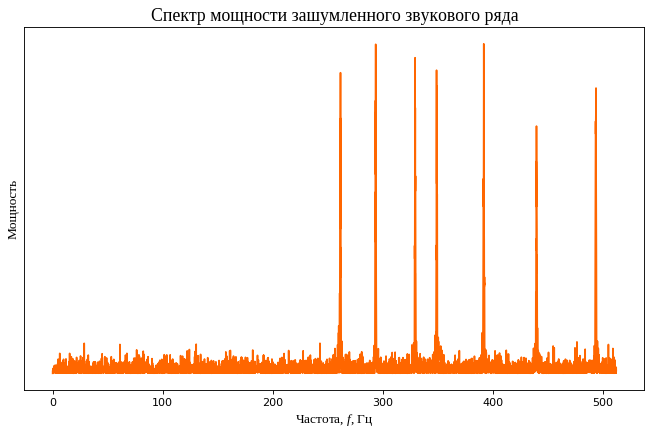

time: 367 ms


In [57]:
# Формирование графика

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
plt.title("Спектр мощности зашумленного звукового ряда", fontname=fontName, fontsize=titleFontSize)  # Заголовок
plt.xlabel(r"Частота, $\mathit{f}$, Гц", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
plt.ylabel("Мощность", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
plt.yticks([])  # Нет значений на оси ординат
plt.plot(freq, fpNotes, color=fColor)
plt.show()  # Построение графика

### 3.3.Формирование спектрограммы

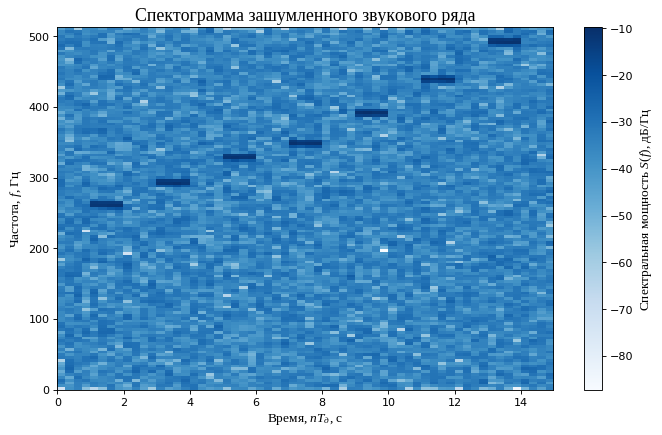

time: 870 ms


In [58]:
# Формирование спектрограммы звукового ряда

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
ax = fig.gca()
plt.title("Спектограмма зашумленного звукового ряда", fontname=fontName, fontsize=titleFontSize)  # Заголовок
plt.xlabel(r"Время, $\mathit{nТ_д}$, с", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
plt.ylabel(r"Частота, $\mathit{f}$, Гц", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
pxx, freqs, ts, cax = plt.specgram(ngamma_notes, Fs=fd, scale="dB", NFFT=256, noverlap=0, cmap=cm.Blues)
cb = fig.colorbar(cax) # Добавление цветовой шкалы
cb.set_label(label=r"Спектральная мощность $\mathit{S(f)}$, дБ/Гц", fontsize=fontSize, fontname=fontName)   # Изменение параметров шрифта цветовой шкалы

plt.show()  # Построение графика

### 3.4.Проигрывание и сохранение в файл звукового ряда

In [59]:
# Проигрывание гаммы
Audio(ngamma_notes, rate=audiorate)

time: 5.81 ms


In [60]:
# Запись мелодии в WAV-файл
write("noisygamma_4000.wav", audiorate, ngamma_notes)

time: 2.66 ms


## 4.Формирование мелодии
### 4.1.Формирование массива нот

In [61]:
# Формирование массива-мелодии
sw_notes = np.concatenate((get_note(D3,t05),get_note(D3,t05),get_note(D3,t05),get_note(G3,t15),
get_note(D3,t15),get_note(C4,t05),get_note(B3,t05),get_note(A3,t05),
get_note(G4,t15),get_note(D3,t07),get_note(C4,t05),get_note(B3,t05),
get_note(A3,t05),get_note(G4,t15),get_note(D3,t07),get_note(C4,t05),
get_note(B3,t05),get_note(C4,t05),get_note(A3,t15),get_note(D3,t07),
get_note(D3,t05),get_note(G3,t15),get_note(D3,t15),get_note(C4,t05),
get_note(B3,t05),get_note(A3,t05),get_note(G4,t15),get_note(D3,t07),
get_note(C4,t05),get_note(B3,t05),get_note(A3,t05),get_note(G4,t15),
get_note(D3,t07),get_note(C4,t05),get_note(B3,t05),get_note(C4,t05),
get_note(A3,t15),get_note(D3,t07),get_note(D3,t05),get_note(E3,t09),
get_note(E3,t07),get_note(C4,t07),get_note(B3,t07),get_note(A3,t07),
get_note(G3,t07),get_note(G3,t05),get_note(A3,t05),get_note(B3,t05),
get_note(A3,t07),get_note(E3,t05),get_note(F3d,t09),get_note(D3,t07),
get_note(D3,t05),get_note(E3,t09),get_note(E3,t07),get_note(C4,t07),
get_note(B3,t07),get_note(A3,t07),get_note(G3,t07),get_note(D3,t07),
get_note(A3,t05),get_note(A3,t15),get_note(D3,t07),get_note(D3,t05),
get_note(E3,t09),get_note(E3,t07),get_note(C4,t07),get_note(B3,t07),
get_note(A3,t07),get_note(G3,t07),get_note(G3,t05),get_note(A3,t05),
get_note(B3,t05),get_note(A3,t07),get_note(E3,t07),get_note(F3d,t05),
get_note(D3,t09),get_note(D3,t05),get_note(G4,t07),get_note(F4,t05),
get_note(D3,t07),get_note(D4,t05),get_note(C4,t07),get_note(A3,t05),
get_note(A3,t07),get_note(G3,t05),get_note(D3,t30)))

time: 9.71 ms


### 4.2.Проигрывание и сохранение в файл мелодии

In [62]:
# Проигрывание мелодии
Audio(sw_notes, rate=audiorate)

time: 7.06 ms


In [63]:
# Запись мелодии в WAV-файл
write("melody.wav", audiorate, sw_notes)

time: 3.75 ms
